In [5]:
import numpy as np
import gzip
import tskit
import arg_needle_lib

In [2]:
ts = tskit.load("sim_sel0_daf0.25_id1_samples200.argn.trees")

In [37]:
tru_ts = tskit.load("sim_sel0_daf0.25_id1_samples200.ts")

In [52]:
mut_time = tru_ts.mutations_time[tru_ts.mutations_site == tru_ts.site(position=500000).id][0]

In [6]:
#with open() as hapF:
with gzip.open("sim_sel0_daf0.25_id1_samples200.hap.gz", "rt") as hapF:
    for line in hapF:
        fields = line.strip().split()
        pos = int(fields[2])
        if pos == 500000:
            gt = list(map(int, fields[5:]))
            break

In [8]:
print(gt)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 

In [20]:
der_leaves = np.nonzero(gt)[0]

In [19]:
center_tree = ts.at(500000)

In [30]:
mut_node = center_tree.mrca(*der_leaves)

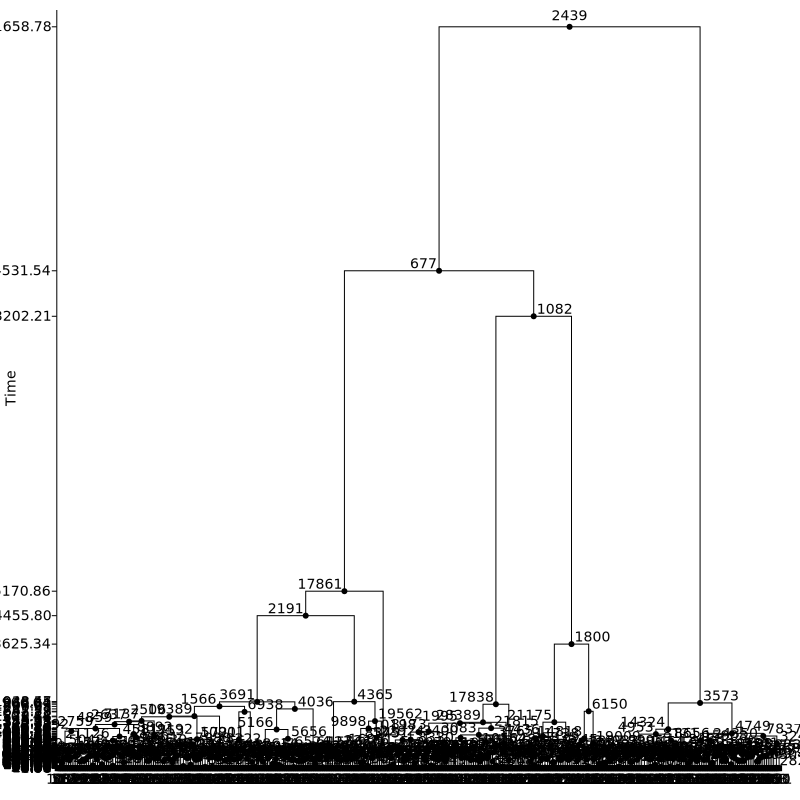

In [26]:
center_tree.draw_svg(size=(800, 800), y_axis="log_time")

In [56]:
tables = ts.dump_tables()

In [57]:
site_id = tables.sites.add_row(position=500000, ancestral_state="0")
tables.mutations.add_row(site=site_id, node=mut_node, derived_state="1", time=mut_time)

0

In [58]:
tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,3573,4479,1,-1,


In [59]:
mut_ts = tables.tree_sequence()

In [61]:
mut_ts

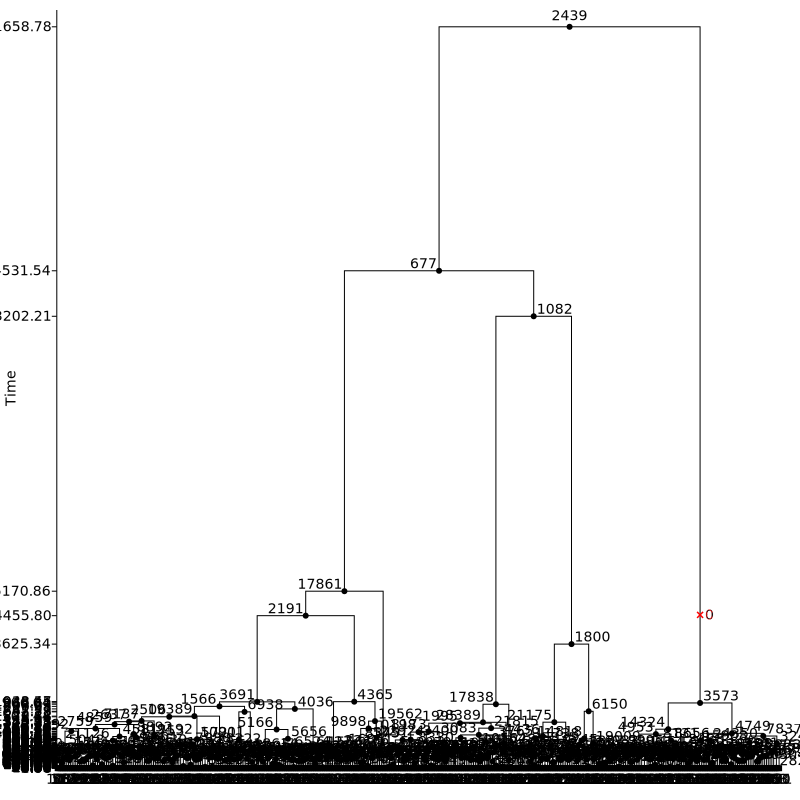

In [60]:
mut_ts.at(500000).draw_svg(size=(800, 800), y_axis="log_time")